# --- Step 1: Import Libraries ---

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# --- Step 2: Load Dataset ---
## Kaggle dataset (Pima Indians Diabetes Dataset)

In [18]:
import pandas as pd

df = pd.read_csv("diabetes.csv.xls")   # treat it like a CSV
print("Dataset shape:", df.shape)

Dataset shape: (768, 9)


In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# --- Step 3: Data Exploration ---

In [20]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

## Class distribution

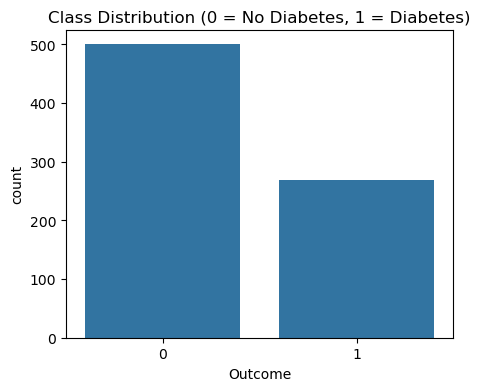

In [22]:
plt.figure(figsize=(5,4))
sns.countplot(x='Outcome', data=df)
plt.title("Class Distribution (0 = No Diabetes, 1 = Diabetes)")
plt.savefig("class_distribution.png")   # ✅ Save figure
plt.show()

## Correlation heatmap

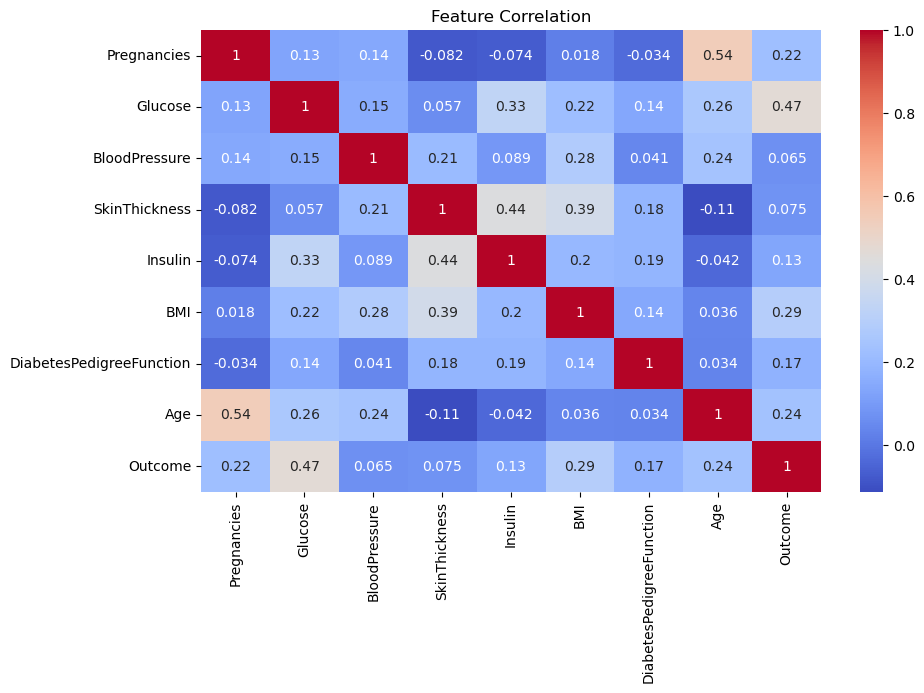

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.savefig("correlation_heatmap.png")   # ✅ Save figure
plt.show()

# --- Step 4: Preprocessing ---

In [24]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# --- Step 5: Train Models ---

In [25]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

In [26]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    results[name] = {"Accuracy": acc, "ROC-AUC": roc}
    
    print(f"\n{name} Results:")
    print("Accuracy:", acc)
    print("ROC-AUC:", roc)
    print(classification_report(y_test, y_pred))
    


Logistic Regression Results:
Accuracy: 0.7142857142857143
ROC-AUC: 0.8229629629629629
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154


Random Forest Results:
Accuracy: 0.7727272727272727
ROC-AUC: 0.8167592592592593
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       100
           1       0.71      0.59      0.65        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154


XGBoost Results:
Accuracy: 0.7337662337662337
ROC-AUC: 0.8051851851851852
              precision    recall  f1-score   support

           0       0.79      0.80      0.80     

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:41:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


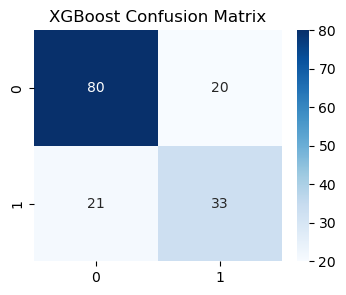

In [30]:
# Confusion matrix

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title(f"{name} Confusion Matrix")
plt.savefig(f"{name}_confusion_matrix.png")   # ✅ Save figure
plt.show()

# --- Step 6: Compare Results ---

In [31]:
results_df = pd.DataFrame(results).T
print("\n📊 Model Comparison:\n")
print(results_df)


📊 Model Comparison:

                     Accuracy   ROC-AUC
Logistic Regression  0.714286  0.822963
Random Forest        0.772727  0.816759
XGBoost              0.733766  0.805185


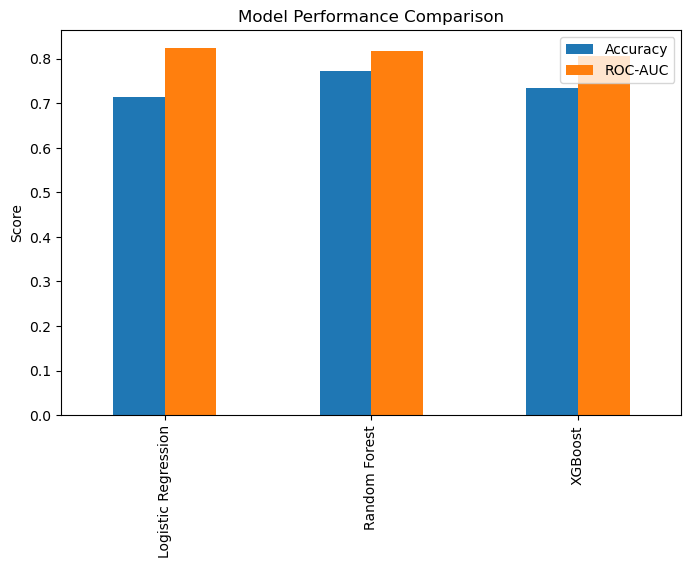

In [32]:
results_df.plot(kind="bar", figsize=(8,5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.savefig("model_comparison.png")   # ✅ Save figure
plt.show()

# --- Step 7: ROC Curve (Best Model Example: XGBoost) ---

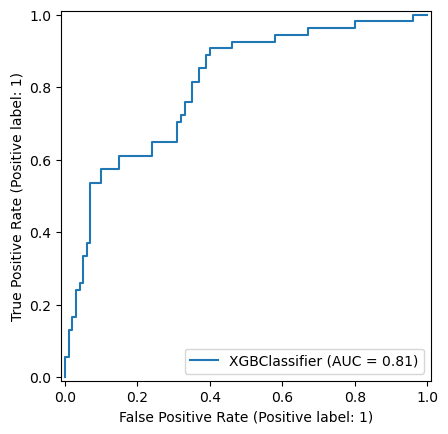

In [33]:
best_model = models["XGBoost"]
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.savefig("roc_curve_xgboost.png")   # ✅ Save figure
plt.show()